# Major Water Sources of Chennai
1) Poondi<br>
2) Cholavaram<br>
3) Redhills<br>
4) Chembarambakkam

In [107]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline

In [108]:
def read_input_file(filepath):
    frame = pd.read_csv(filepath)
    frame['Date'] = pd.to_datetime(frame['Date'], format='%d-%m-%Y')
    frame = frame.sort_values('Date', ascending=True).reset_index(drop=True)
    return frame

In [109]:
reservoir_levels = read_input_file('chennai_reservoir_levels.csv')
rainfall = read_input_file('chennai_reservoir_rainfall.csv')

In [110]:
reservoir_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [111]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


In [112]:
print(reservoir_levels.isnull().sum(), '\n\n', rainfall.isnull().sum())

Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64 

 Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64


In [113]:
start_date, end_date = reservoir_levels['Date'].min(), reservoir_levels['Date'].max()
print('Dataset Start Date:', start_date.strftime('%d-%b-%y'))
print('Dataset End Date:', end_date.strftime('%d-%b-%y'))

Dataset Start Date: 01-Jan-04
Dataset End Date: 23-Dec-19


In [114]:
reservoir_levels.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5836.000000,5836.000000,5836.000000,5836.000000
mean,1116.271270,234.265965,1533.680166,1285.674289
std,1020.316805,272.289990,906.251292,964.355749
min,0.900000,0.000000,0.000000,0.000000
25%,200.225000,18.375000,791.000000,408.000000
50%,775.500000,91.000000,1596.000000,1190.000000
75%,1975.000000,445.000000,2212.250000,2047.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [115]:
rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5836.000000,5836.000000,5836.000000,5836.000000
mean,3.464402,3.758773,3.828992,4.012688
std,13.065897,14.267783,15.011809,16.251079
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


# Visualization

C:\Users\dell\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


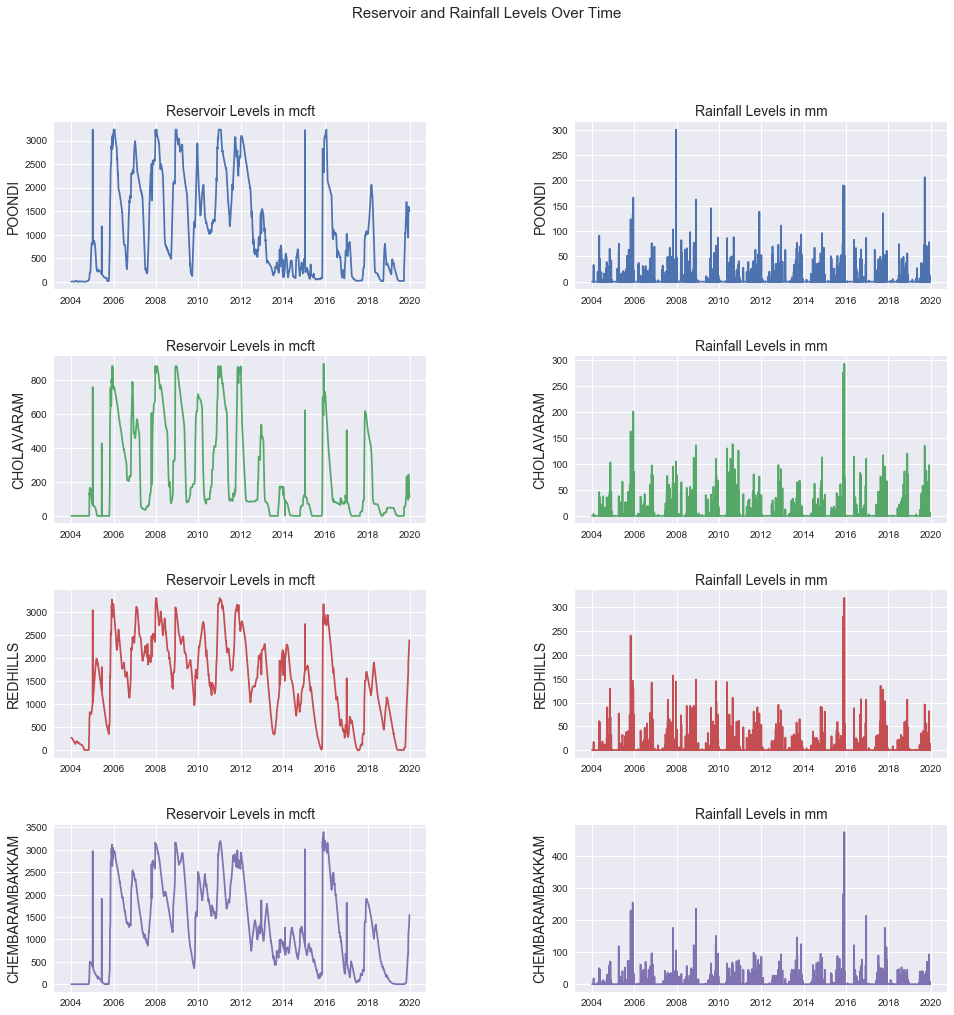

In [116]:
def plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall, type='line', alpha=1):
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for index, column in enumerate(reservoir_levels.columns[1:]):
        c = colors[index]
        if type == 'line':
            ax[index][0].plot(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].plot(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        else:
            ax[index][0].bar(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].bar(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        ax[index][0].set_ylabel(column, size=14)
        ax[index][1].set_ylabel(column, size=14)
        ax[index][0].set_title('Reservoir Levels in mcft', size=14)
        ax[index][1].set_title('Rainfall Levels in mm', size=14)
    fig.suptitle('Reservoir and Rainfall Levels Over Time', size=15)

plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall)

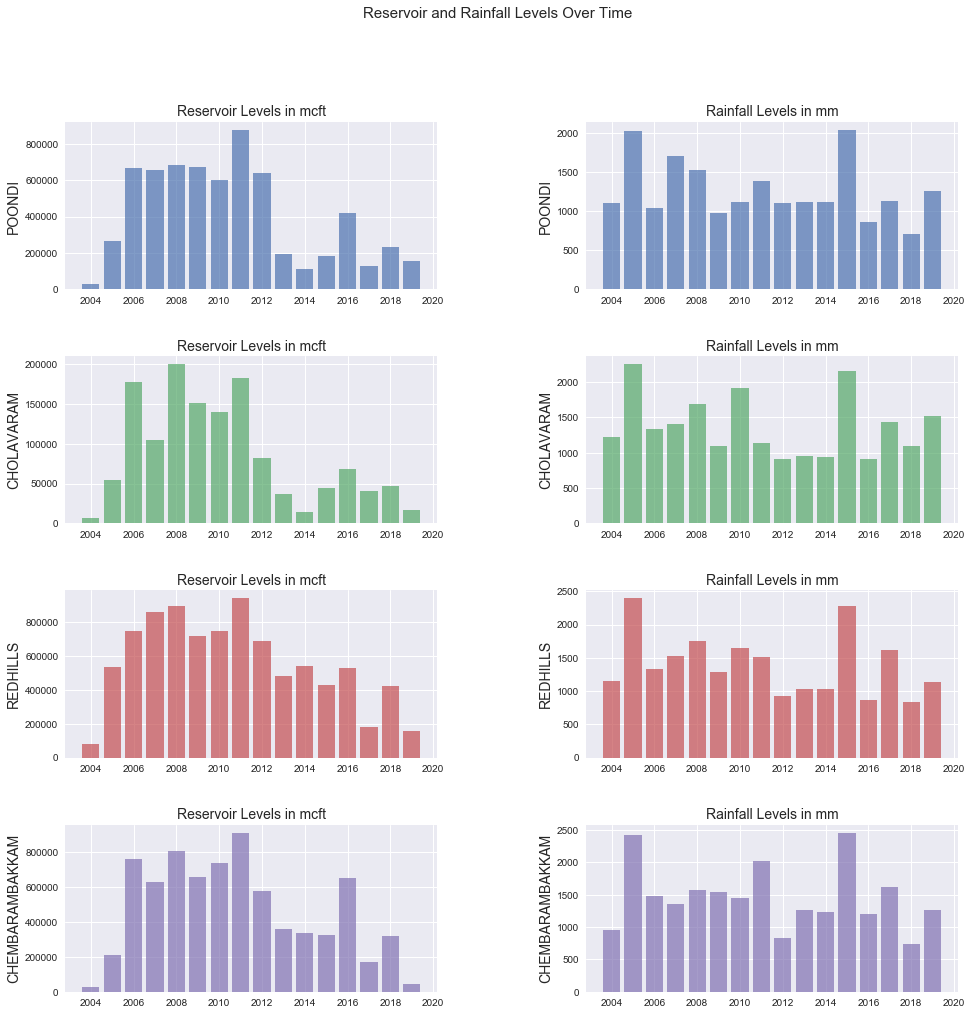

In [117]:
res_year = reservoir_levels.groupby(reservoir_levels.Date.dt.year).sum().reset_index()
rain_year = rainfall.groupby(rainfall.Date.dt.year).sum().reset_index()
plot_rainfall_and_reservoir_levels(res_year, rain_year, 'bar', 0.7)

A couple of things from the plots above. We can clearly see firstly that reservoir levels are in fact decreasing. All the regions are doing worse in more recent years than in previous years. Some regions are doing very poorly, like Cholavaram (which already has a very low mean reservoir level).

Secondly, it does appear that 2018 was not a very good rainfall year (which is one of the listed reasons for the drought that's occurring in Chennai now). A few of the other years look similar, 2012-2014 appears to have low rainfall levels and we see corresponding decreases in reservoir levels in most of the regions. Right now, I'm interested in how bad 2018 was, so let's take a look at the aggregated rainfall across all the regions per year.



Text(0.5, 1.0, 'Rainfall Across All 4 Chennai Regions by Year')

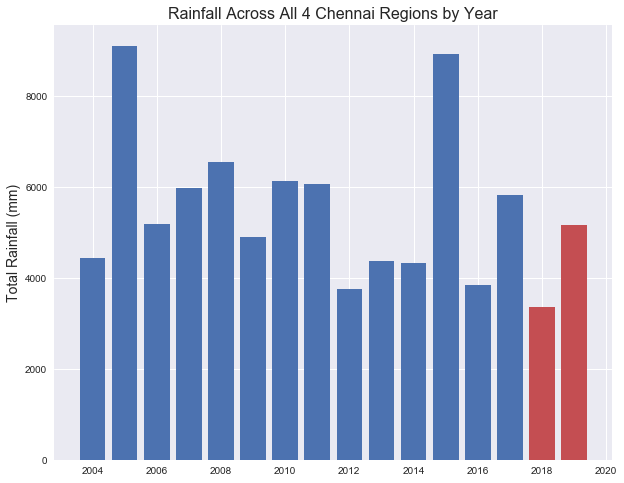

In [118]:
# Aggregate per year
rain_year_aggregate = rain_year.iloc[:, 1:].sum(axis=1)
c = [colors[0] for i in range(rain_year_aggregate.shape[0] - 2)]
c += [colors[2] for i in range(2)]

plt.figure(figsize=(10, 8))
plt.bar(rain_year['Date'], rain_year_aggregate, color=c)
plt.ylabel('Total Rainfall (mm)', size=14)
plt.title('Rainfall Across All 4 Chennai Regions by Year', size=16)

2018 does appear to have a low amount of rainfall, and there were similarly low amounts in 2016 and 2012-2014. Chennai gets much of its water during monsoon season, which starts in October and goes through December. According to wikipedia the dry season begins in February and goes through early June. Perhaps then we should take a look at the reservoir levels at the start of the dry season, since this is the time that the reservoir levels are most crucial. By looking at the start of the dry season, we can see how prepared Chennai will be until the next monsoon season.

In [119]:
# Subset to the beginning of February for each year
is_february = reservoir_levels['Date'].dt.month == 2
is_day_one = reservoir_levels['Date'].dt.day == 1
dry_season_res_levels = reservoir_levels.loc[is_february & is_day_one, :].reset_index(drop=True)
dry_season_res_levels

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-02-01,4.8,0.0,220.0,0.0
1,2005-02-01,851.4,56.5,1458.0,275.0
2,2006-02-01,3035.0,721.0,2624.0,2843.0
3,2007-02-01,2565.0,545.0,3106.0,2157.0
4,2008-02-01,3061.0,867.0,3022.0,2960.0
5,2009-02-01,3025.0,778.0,2528.0,2679.0
6,2010-02-01,1493.0,686.0,2342.0,2254.0
7,2011-02-01,3108.0,840.0,3254.0,3080.0
8,2012-02-01,3048.0,495.0,2771.0,2719.0
9,2013-02-01,1359.0,398.0,2212.0,980.0


Text(0.5, 1.0, 'Reservoir Levels at the beginning of Dry Season in Chennai')

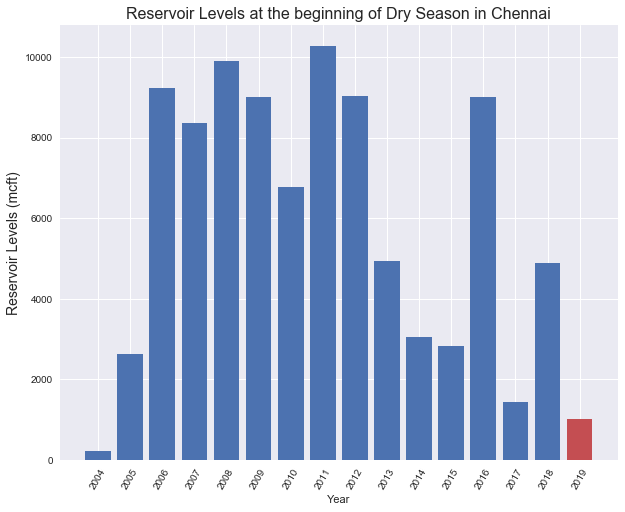

In [120]:
# Sum reservoir levels across all 4 regions per year
dry_season_res_all_regions = dry_season_res_levels.iloc[:, 1:].sum(axis=1)
x_tick_locations = range(dry_season_res_levels.shape[0])
c = [colors[0] for i in range(dry_season_res_levels.shape[0] - 1)]
c.append(colors[2])

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.bar(x_tick_locations, dry_season_res_all_regions, color=c)
ax.set_xticks(x_tick_locations)
ax.set_xticklabels(dry_season_res_levels.Date.dt.strftime('%Y'), rotation=60)
ax.set_ylabel('Reservoir Levels (mcft)', size=14)
ax.set_xlabel('Year')
ax.set_title('Reservoir Levels at the beginning of Dry Season in Chennai', size=16)

It certainly does appear that on February 1st, 2019 the Chennai experienced very low reservoir levels, less than any year other than 2004, evidence that the drought is real and we can see it here.

Text(0.5, 1.0, 'Reservoir Levels in Chennai per Day')

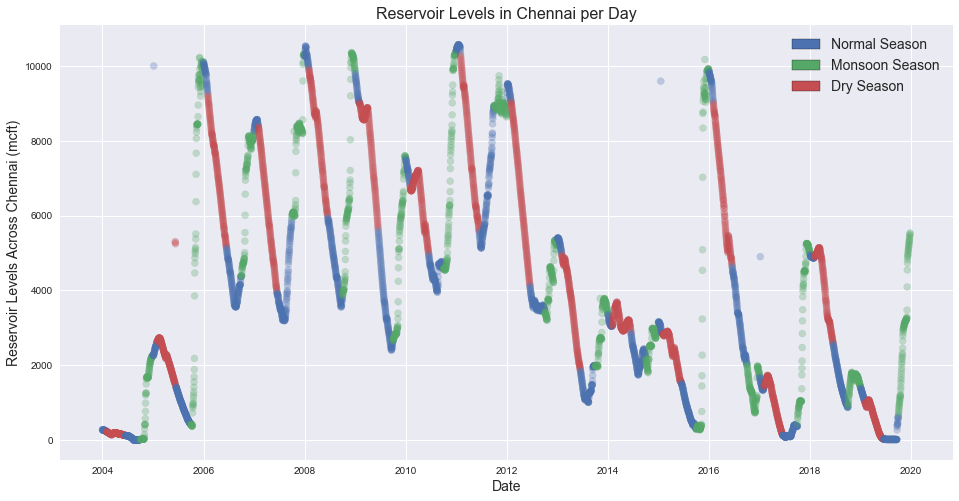

In [131]:
def assign_temporal_categories(date):
    if date.month in [2, 3, 4, 5] or date.month == 6 and date.day <= 15:
        return colors[2]
    elif date.month in [10, 11, 12]:
        return colors[1]
    else:
        return colors[0]

c = reservoir_levels['Date'].apply(assign_temporal_categories, colors)
chennai_reservoirs = reservoir_levels.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(16, 8))
plt.scatter(reservoir_levels['Date'].values, chennai_reservoirs, color=c, alpha=0.3)
plt.ylabel('Reservoir Levels Across Chennai (mcft)', size=14)
plt.xlabel('Date', size=14)
legend_labels = {'Normal Season':colors[0], 'Monsoon Season':colors[1], 'Dry Season':colors[2]}
leg_el = [mpatches.Patch(facecolor=value, edgecolor='k', label=key) for key, value in legend_labels.items()]
plt.legend(handles=leg_el, prop={'size':14})
plt.title('Reservoir Levels in Chennai per Day', size=16)

In [123]:
data_l= pd.read_csv("chennai_reservoir_levels.csv",index_col=["Date"])
data_r= pd.read_csv("chennai_reservoir_rainfall.csv", index_col=["Date"])
data_l.index = pd.to_datetime(data_l.index)
data_r.index = pd.to_datetime(data_r.index)

In [124]:
data_l.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,3.9,0.0,268.0,0.0
2004-02-01,3.9,0.0,268.0,0.0
2004-03-01,3.9,0.0,267.0,0.0
2004-04-01,3.9,0.0,267.0,0.0
2004-05-01,3.8,0.0,267.0,0.0


In [125]:
data_r.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,0.0,0.0,0.0,0.0
2004-02-01,0.0,0.0,0.0,0.0
2004-03-01,0.0,0.0,0.0,0.0
2004-04-01,0.0,0.0,0.0,0.0
2004-05-01,0.0,0.0,0.0,0.0


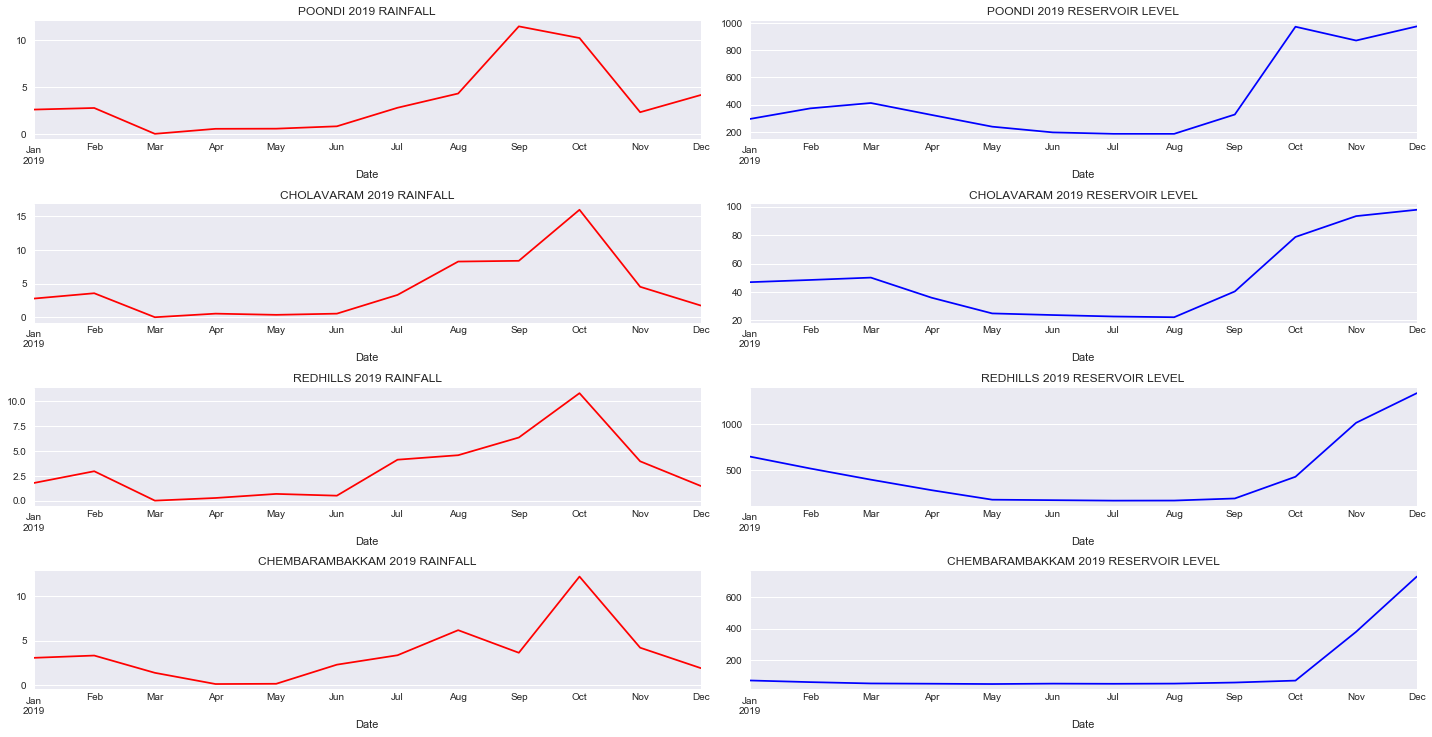

In [127]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(20,10))
data_r[data_r.index.year==2019]["POONDI"].resample("M").mean().plot(kind="line",ax=ax1,color="r",title="POONDI 2019 RAINFALL")
data_l[data_l.index.year==2019]["POONDI"].resample("M").mean().plot(kind="line",ax=ax2,color="b", title="POONDI 2019 RESERVOIR LEVEL")
f.tight_layout()
data_r[data_r.index.year==2019]["CHOLAVARAM"].resample("M").mean().plot(kind="line",ax=ax3,color="r",title="CHOLAVARAM 2019 RAINFALL")
data_l[data_l.index.year==2019]["CHOLAVARAM"].resample("M").mean().plot(kind="line",ax=ax4,color="b",title="CHOLAVARAM 2019 RESERVOIR LEVEL")
f.tight_layout()
data_r[data_r.index.year==2019]["REDHILLS"].resample("M").mean().plot(kind="line",ax=ax5,color="r",title="REDHILLS 2019 RAINFALL")
data_l[data_r.index.year==2019]["REDHILLS"].resample("M").mean().plot(kind="line",ax=ax6,color="b",title="REDHILLS 2019 RESERVOIR LEVEL")
f.tight_layout()
data_r[data_r.index.year==2019]["CHEMBARAMBAKKAM"].resample("M").mean().plot(kind="line",ax=ax7,color="r",title="CHEMBARAMBAKKAM 2019 RAINFALL")
data_l[data_l.index.year==2019]["CHEMBARAMBAKKAM"].resample("M").mean().plot(kind="line",ax=ax8,color="b", title="CHEMBARAMBAKKAM 2019 RESERVOIR LEVEL")

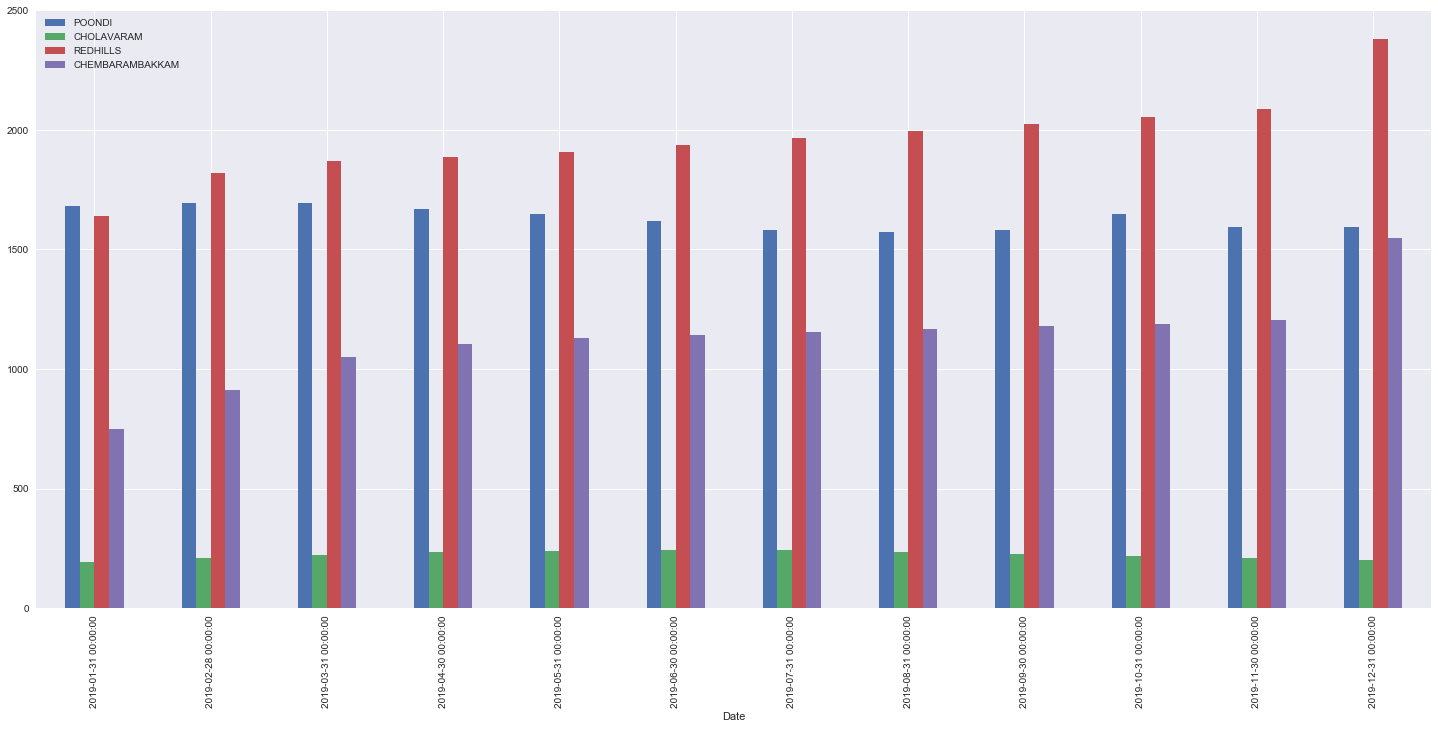

In [129]:
f,ax =plt.subplots(1,1,figsize=(25,11))
data_l[data_l.index.year==2019].resample("M").max().plot(kind="bar",ax =ax)

# Reservoir prediction using LSTM

In [217]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.callbacks import EarlyStopping

In [218]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [219]:
dataframe = read_csv('chennai_reservoir_levels.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [220]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [221]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [222]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [223]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [224]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=20, batch_size=70, validation_data=(testX, testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)
# history=model.fit(trainX, trainY, epochs=20, batch_size=70, callbacks=[EarlyStopping(monitor='val_loss', patience=10)],verbose=1)

Train on 4637 samples, validate on 1137 samples
Epoch 1/20
4637/4637 [==============================] - 4s 804us/step - loss: 0.0619 - val_loss: 0.0068
Epoch 2/20
4637/4637 [==============================] - 0s 63us/step - loss: 0.0131 - val_loss: 0.0064
Epoch 3/20
4637/4637 [==============================] - 0s 51us/step - loss: 0.0097 - val_loss: 0.0048
Epoch 4/20
4637/4637 [==============================] - 0s 60us/step - loss: 0.0082 - val_loss: 0.0041
Epoch 5/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.0070 - val_loss: 0.0035
Epoch 6/20
4637/4637 [==============================] - 0s 55us/step - loss: 0.0060 - val_loss: 0.0030
Epoch 7/20
4637/4637 [==============================] - 0s 57us/step - loss: 0.0051 - val_loss: 0.0026
Epoch 8/20
4637/4637 [==============================] - 0s 71us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 9/20
4637/4637 [==============================] - 0s 58us/step - loss: 0.0035 - val_loss: 0.0018
Epoch 10/20
4637/4637 [=

In [225]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 4)                 560       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 565
Trainable params: 565
Non-trainable params: 0
_________________________________________________________________


In [226]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [227]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [228]:
print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))

Train Mean Absolute Error: 69.62153446224355
Train Root Mean Squared Error: 129.54737136471198
Test Mean Absolute Error: 64.62281553615641
Test Root Mean Squared Error: 86.35891925253621


In [229]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [230]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

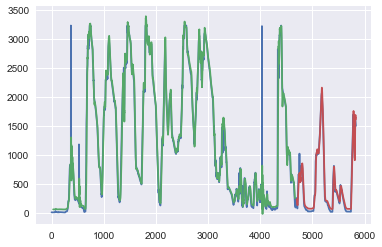

In [231]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

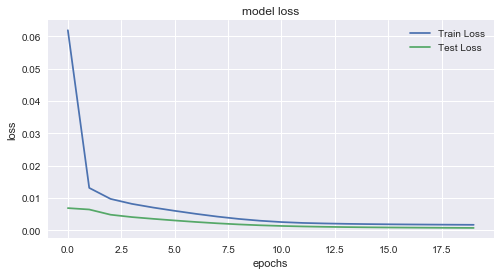

In [233]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

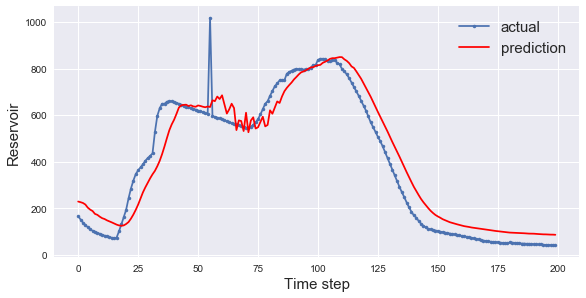

In [239]:
import seaborn as sns
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, testY[0][:200], marker='.', label="actual")
plt.plot(aa, testPredict[:,0][:200], 'r', label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Reservoir', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# Rainfall prediction using LSTM

In [237]:
def lstmlpredict(dataframe):
    dataset = dataframe.values
    dataset = dataset.astype('float32')

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history=model.fit(trainX, trainY, epochs=20, batch_size=70, validation_data=(testX, testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:,0]))
    print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
    print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:,0]))
    print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))

    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();
    
    aa=[x for x in range(200)]
    plt.figure(figsize=(8,4))
    plt.plot(aa, testY[0][:200], marker='.', label="actual")
    plt.plot(aa, testPredict[:,0][:200], 'r', label="prediction")
    plt.tick_params(left=False, labelleft=True) #remove ticks
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Rainfall', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show();

Train on 3908 samples, validate on 1924 samples
Epoch 1/20
3908/3908 [==============================] - 4s 997us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 2/20
3908/3908 [==============================] - 0s 60us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 3/20
3908/3908 [==============================] - 0s 66us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 4/20
3908/3908 [==============================] - 0s 59us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/20
3908/3908 [==============================] - 0s 60us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 6/20
3908/3908 [==============================] - 0s 60us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 7/20
3908/3908 [==============================] - 0s 62us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8/20
3908/3908 [==============================] - 0s 69us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 9/20
3908/3908 [==============================] - 0s 63us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 10/20
3908/3908 [=

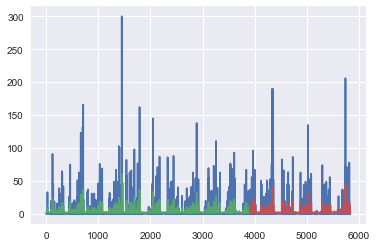

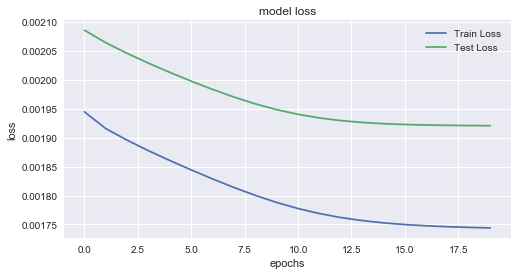

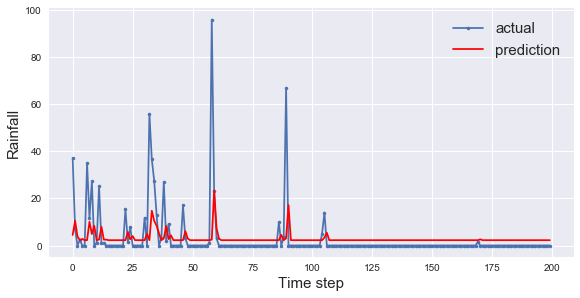

In [238]:
dataframe1 = read_csv('chennai_reservoir_rainfall.csv', usecols=[1], engine='python')
lstmlpredict(dataframe1)